Demo for creating resource estimates for matrix inversion by QSVT

Cambridge Consultants 2024\
Walden Killick

In [6]:
import pyqsp
from pyqsp.angle_sequence import QuantumSignalProcessingPhases, Polynomial
import random
import numpy as np
from qce24_qre_challenge.circuit import QSVT, BlockEncoding
from qce24_qre_challenge.sparse_matrices import BandedCirculantMatrix
from qce24_qre_challenge.quantum_oracles import BandedCirculantOracle

In [7]:
size = 8

b = np.random.rand(size)
b /= np.linalg.norm(b)

coefficients = [random.uniform(0, 1) for _ in range(3)]
matrix = BandedCirculantMatrix(size=size, coefficients=coefficients)

banded_circulant_oracle = BandedCirculantOracle(matrix)

block_encoding = BlockEncoding(banded_circulant_oracle)

In [8]:
pg = pyqsp.poly.PolyOneOverX()
pcoefs = pg.generate(kappa=3, epsilon=1)
poly = Polynomial(pcoefs)

phase_angles = QuantumSignalProcessingPhases(
    poly, signal_operator="Wx", method="laurent", measurement="x"
)

b=9, j0=5
[PolyOneOverX] minimum [-1.98763975] is at [-0.37696341]: normalizing
[PolyOneOverX] bounding to 0.5
[pyqsp.PolyOneOverX] pcoefs=[  0.           2.25424985   0.          -8.77167835   0.
  18.72313322   0.         -22.72835474   0.          14.6569883
   0.          -3.88337475]


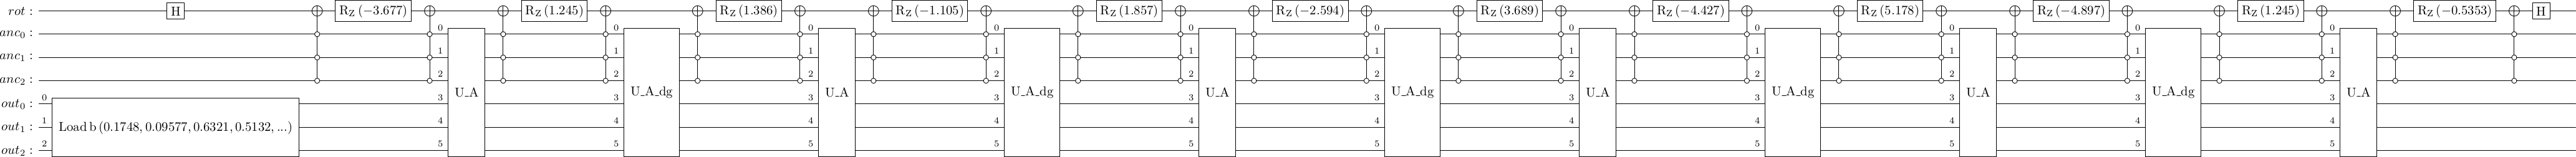

In [12]:
qsvt = QSVT(block_encoding, phase_angles, b)
qsvt_circuit = qsvt.create_circuit()

qsvt_circuit.draw('latex')